# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #1ED760; text-align: center; line-height: 1.25;"><b>🎵Spotify App Reviews🎶</b><br><span style="color: #191414; font-size: 30px">on Google Play Store</span></h1>
<hr>

<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Table of Contents</p>

* [Overview](#0)
* [Importing Libraries](#1)
* [Loading Dataset](#2)
* [Seaborn Color Style](#3)
* [Data Cleaning and EDA](#4)
* [Text Preprocessing](#5)
* [Building Model](#6)
    1. [LSTM](#7)
    2. [GRU](#8)
    2. [ELECTRA](#9)
* [Prediction](#10)
* [Acknowledge](#11)

<a id="0"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Overview</p>

<p align="center">
  <img src="https://developer.spotify.com/assets/branding-guidelines/logo@2x.png" />
</p>

Spotify is one of the largest music streaming service providers, with over 422 million monthly active users, including 182 million paying subscribers, as of March 2022. In this notebook we will dive deeper on gaining insight from user's review of Spotify App on Google Play Store. In the end, we can make a prediction based on data we trained on Deep Learning model to determine whether a certain text (sentence) is good/netral/bad review

<h1 style="font-family: Trebuchet MS; font-size: 16px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>This notebook aims to:</b></h1>

- Look for engaging information regarding the reviews
- Perform data cleaning and preprocessing before fedding the data into DNN
- Build DL models
- Predict the sentiment of the reviews

<a id="1"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Importing Libraries</p>

In [1]:
!pip install tensorflow-text==2.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 10.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 36.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77056 sha256=30e89fcf9bd6914b47e99ee6088339f9dd01a1f96770d1a1bae7be5c66980102
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.1
    Uninstalling wrapt-1.14.1:
      Successfully uninstalled wrapt-1.14.1
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: six
    Found existing installation:

In [2]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from wordcloud import WordCloud

# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<a id="2"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Loading Dataset</p>

In [3]:
df = pd.read_csv('../input/spotify-app-reviews-2022/reviews.csv')
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


<a id="3"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Seaborn Color Style</p>

In [5]:
#set color for data visualization
sns.set(rc={"axes.facecolor":"#e6ffed","figure.facecolor":"#e6ffed", "grid.color":"#99e2b4",
            "axes.edgecolor":"#99e2b4", "axes.labelcolor":"#195e2d", "xtick.color":"#195e2d",
            "ytick.color":"#195e2d"})

# ['#4a7c59', '#68b0ab', '#8fc0a9', '#c8d5b9', '#faf3dd']
palettes = ['#eee82c', '#91cb3e', '#53a548', '#4c934c', '#19381f']
cmap = colors.ListedColormap(['#137547', '#2a9134', '#3fa34d', '#5bba6f', '#19381f'])

<h1 style="font-family: Trebuchet MS; font-size: 16px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>Additional information:</b></h1>

* axes.facecolor --> set color for background inside x and y axis
* figure.facecolor --> set color for background outside x and y axis where labels placed
* grid.color --> set color for grid line
* axes.edgecolor --> set color for line x and y axis
* axes.labelcolor --> set color for labels in the plot
* xtick.color --> set color for the values of x axis
* ytick.color --> set color for the values of y axis

<a id="4"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Data Cleaning and EDA</p>

<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>Analyze each column</b></h1>

<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>- Reply</b></h1>
Look at the Reply column, there are lots of missing value. It seems we can't draw useful information from it. Before we drop this feature, let's get a glance what is it about


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating of Replied Reviews')

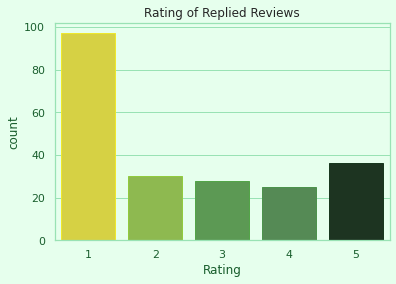

In [6]:
reply = df[~df['Reply'].isna()]

ax = sns.countplot(reply['Rating'], palette=palettes, edgecolor=palettes)
ax.set_title('Rating of Replied Reviews')

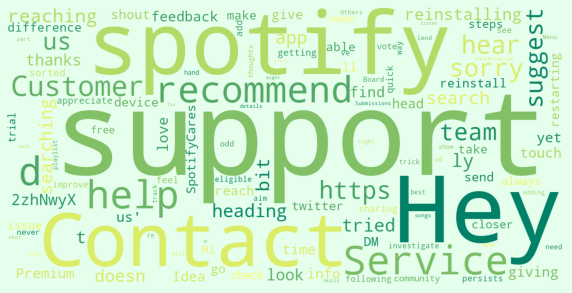

In [7]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,
               background_color='#e6ffed', colormap='summer').generate(' '.join(reply['Reply']))

plt.axis('off')
plt.imshow(wc)

In [8]:
def top_words(text):
    word = pd.DataFrame(wc.process_text(''.join(text)).items()).sort_values(1, ascending=False)
    
    print('Top 5 words that appear most frequently:\n')
    for i in range(5):
        item = word.iloc[i]
        print(item[0] + '\t--> ' + str(item[1]))

In [9]:
top_words(reply['Reply'])

Top 5 words that appear most frequently:

support	--> 204
Hey	--> 194
spotify	--> 166
Contact	--> 118
Service	--> 115


<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>- Time Submitted</b></h1>
Let's find out the data relationship with time or date

In [10]:
df['Time_submitted'] = pd.to_datetime(df['Time_submitted'])

df['Date'] = df['Time_submitted'].apply(lambda x: x.date())

reviews_per_day = df.groupby(df['Date']).count()['Review']
reviews_per_day = reviews_per_day.reset_index()
reviews_per_day['Month'] = reviews_per_day['Date'].apply(lambda x: x.month)

In [11]:
reviews_per_day.rename(columns={'Review':'Total_review'}, inplace=True)
reviews_per_day.head()

,Date,Total_review,Month
0,2022-01-01,46,1
1,2022-01-02,43,1
2,2022-01-03,66,1
3,2022-01-04,56,1
4,2022-01-05,64,1


Text(0.5, 1.0, 'Total Review per Day')

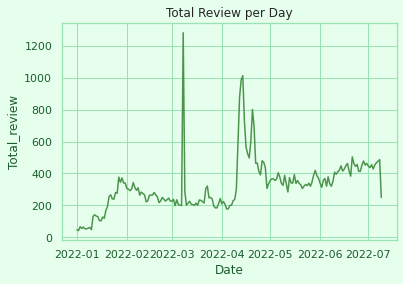

In [12]:
ax = sns.lineplot(data=reviews_per_day, x='Date', y='Total_review', color='#4c934c')
ax.set_title('Total Review per Day')

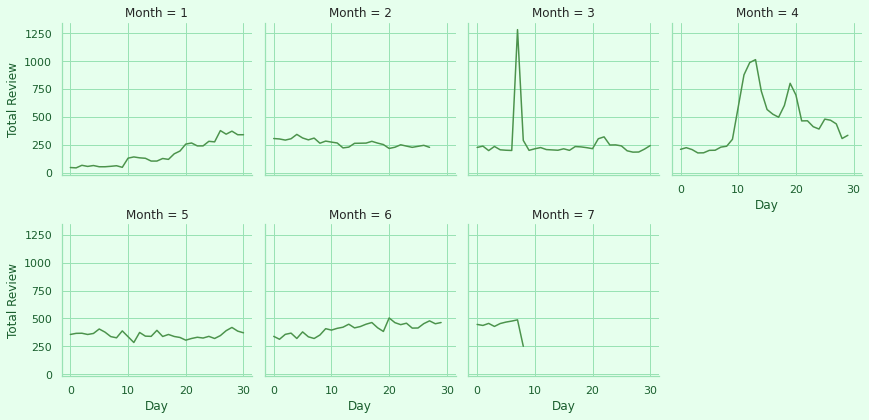

In [13]:
g = sns.FacetGrid(data=reviews_per_day, col='Month', col_wrap=4)
g.map(plt.plot, 'Total_review', color='#4c934c')
g.set_axis_labels(x_var='Day', y_var='Total Review')

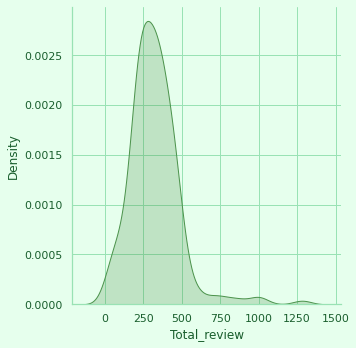

In [14]:
ax = sns.displot(data=reviews_per_day, x='Total_review', kind='kde', fill=True, color='#4c934c')

<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>- Rating</b></h1>
We are going to transform the rating from integer to string and let's see the relationship between rating and length of words

In [15]:
# Let's change the rating to be more general and easier to understand
def rating(score):
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Netral'
    else:
        return 'Bad'

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

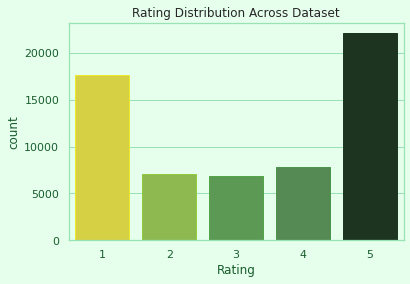

In [16]:
ax = sns.countplot(data=df, x='Rating', palette=palettes, edgecolor=palettes)
ax.set_title('Rating Distribution Across Dataset')

Text(0.5, 1.0, 'Rating Distribution Across Dataset\nAfter Transformation')

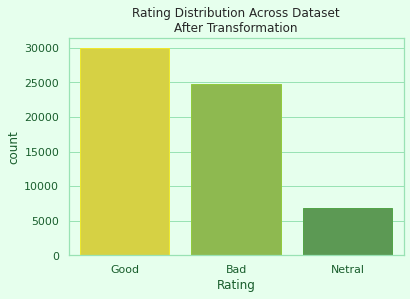

In [17]:
df['Rating'] = df['Rating'].apply(rating)
ax = sns.countplot(data=df, x='Rating', palette=palettes, edgecolor=palettes)
ax.set_title('Rating Distribution Across Dataset\nAfter Transformation')

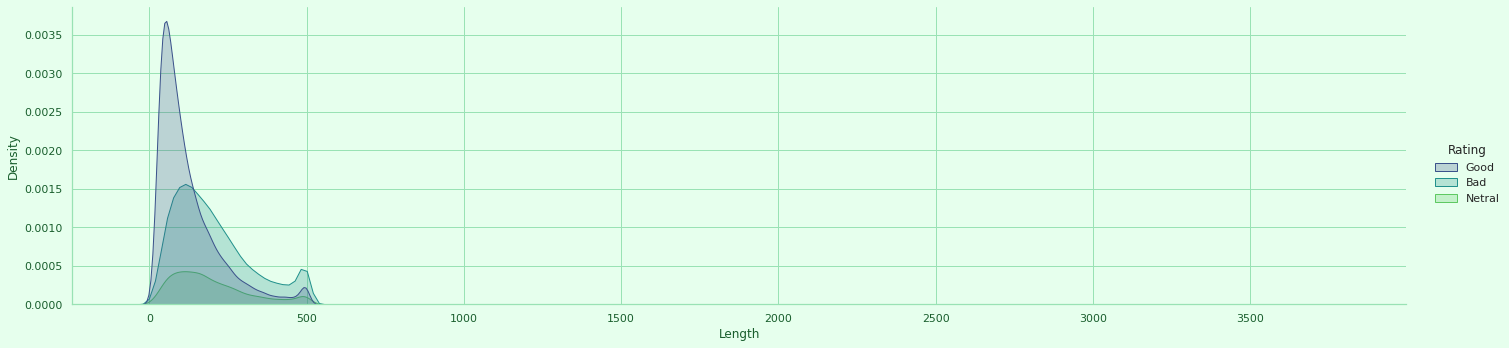

In [18]:
df['Length'] = df['Review'].apply(len)
ax = sns.displot(data=df, x='Length', hue='Rating', kind='kde', fill=True, aspect=4, palette='viridis')

Text(0.5, 1.0, 'Distribution of review Length\nfor Each Rating')

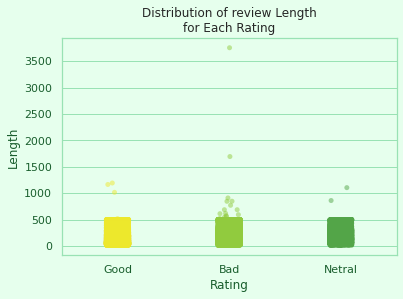

In [19]:
ax = sns.stripplot(data=df, x='Rating', y='Length', alpha=0.5, palette=palettes, edgecolor=palettes)
ax.set_title('Distribution of review Length\nfor Each Rating')

As you can see on the graph above, most of the reviews stuck at 500 length. It's make sense since the text limit is 500. If you realize there are some exceptions for a certain user

Text(0.5, 1.0, 'Average of review Length\nfor Each Rating')

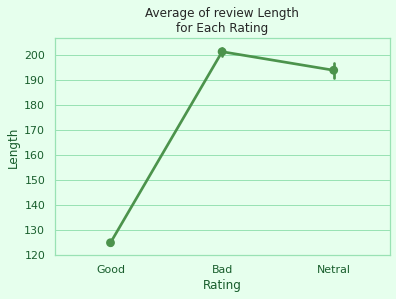

In [20]:
ax = sns.pointplot(data=df, x='Rating', y='Length', color='#4c934c')
ax.set_title('Average of review Length\nfor Each Rating')

<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>- Total Thumbs Up</b></h1>
The review which got the most thumbs up

In [21]:
max_thumb = df['Total_thumbsup'].max()
print(df[df['Total_thumbsup'] == max_thumb].iloc[0]['Review'])

The app is very good. I got to explore many new songs. However, I took out a star because of a few reasons. First:- It sometimes lags and won't show the music dialog box on your screen or in the app and for this I have to restart it. Second:- I cannot delete my history on phone. Third:- I cannot shuffle playlists or Albums. They have to play on the fixed sequence. Fourth:- I cannot see which song is going to play next if it's a radio and Fifth:- Sometimes the song stops and doesn't start radio


Text(8, -0.2, 'Mean: 7.65')

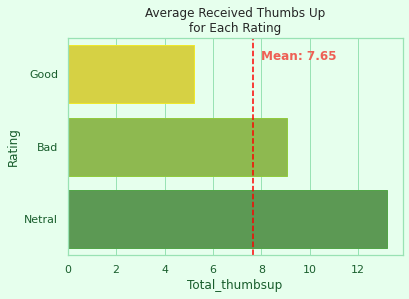

In [22]:
mean_thumb = df['Total_thumbsup'].mean()

ax = sns.barplot(data=df, y='Rating', x='Total_thumbsup', orient='h', ci=None, palette=palettes, edgecolor=palettes)
ax.set_title('Average Received Thumbs Up\nfor Each Rating')
plt.axvline(mean_thumb, color='red', ls='--')
plt.text(x=8, y=-0.2, s='Mean: ' + str(round(mean_thumb, 2)), color='#ee6055', weight='bold')

Text(0.5, 1.0, 'Distribution of Received Thumbs Up\nfor Each Rating')

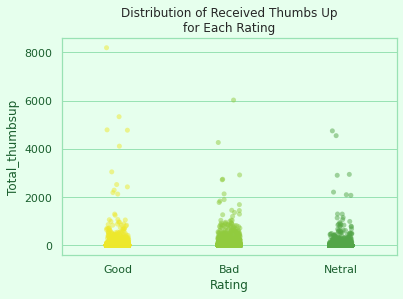

In [23]:
ax = sns.stripplot(data=df, x='Rating', y='Total_thumbsup', palette=palettes, edgecolor=palettes, alpha=0.5)
ax.set_title('Distribution of Received Thumbs Up\nfor Each Rating')

<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>- Review</b></h1>
Let's explore the review text and find out the most frequent words

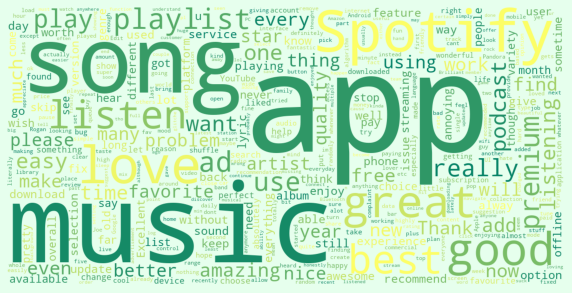

In [24]:
# Most popular word for good review
good = df[df['Rating'] == 'Good']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,
               background_color='#e6ffed', colormap='summer').generate(' '.join(good))

plt.axis('off')
plt.imshow(wc)

In [25]:
top_words(good)

Top 5 words that appear most frequently:

app	--> 15681
music	--> 14881
song	--> 10608
Spotify	--> 8621
love	--> 6909


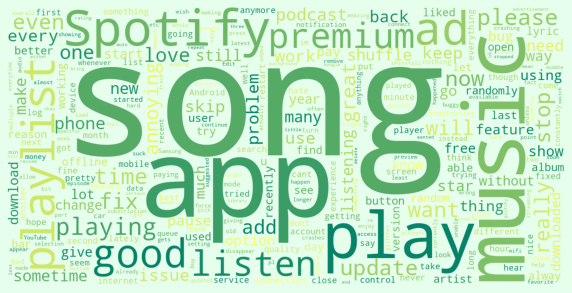

In [26]:
# Most popular word for netral review
netral = df[df['Rating'] == 'Netral']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,
               background_color='#e6ffed', colormap='summer').generate(' '.join(netral))

plt.axis('off')
plt.imshow(wc)

In [27]:
top_words(netral)

Top 5 words that appear most frequently:

song	--> 4993
app	--> 4125
music	--> 2322
play	--> 2032
Spotify	--> 1837


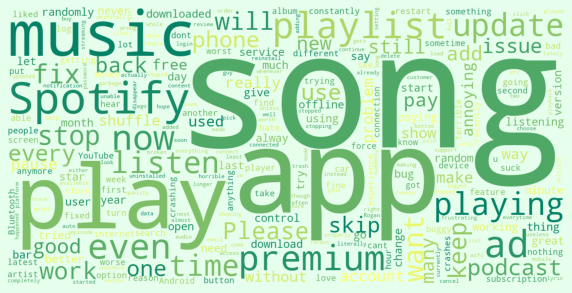

In [28]:
# Most popular word for bad review
bad = df[df['Rating'] == 'Bad']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,
               background_color='#e6ffed', colormap='summer').generate(' '.join(bad))

plt.axis('off')
plt.imshow(wc)

In [29]:
top_words(bad)

Top 5 words that appear most frequently:

song	--> 16766
app	--> 16445
play	--> 8867
music	--> 7745
Spotify	--> 7381


<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>Drop unused columns</b></h1>

In [30]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Date,Length
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",Good,2,NaN,2022-07-09,112
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,Good,1,NaN,2022-07-09,86
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",Good,0,NaN,2022-07-09,106
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,Bad,1,NaN,2022-07-09,47
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,Bad,1,NaN,2022-07-09,100


In [31]:
df_final = df[['Review', 'Rating', 'Length']]

<a id="5"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Text Preprocessing</p>

In [32]:
# Total word in dataset before cleaning
length = df_final['Length'].sum()

<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>Stemming vs Lemmatization</b></h1>

I think this picture can give you a sense of what is the different between stemming and lemmatization
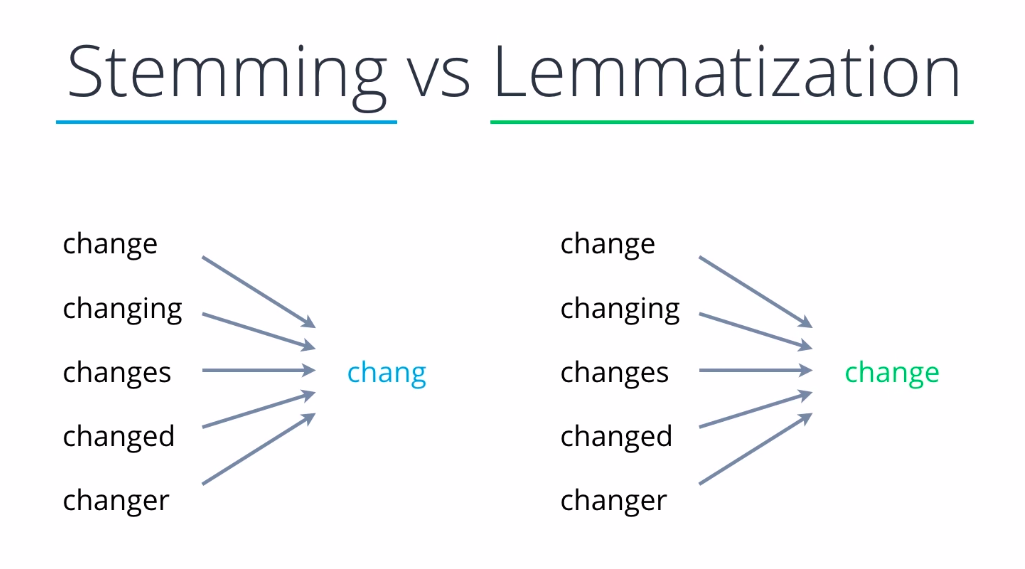

In [33]:
print('Original:')
print(df['Review'][7])
print()

sentence = []
for word in df['Review'][7].split():
    stemmer = SnowballStemmer('english')
    sentence.append(stemmer.stem(word))
print('Stemming:')
print(' '.join(sentence))
print()

sentence = []
for word in df['Review'][7].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, 'v'))
print('Lemmatization:')
print(' '.join(sentence))

Original:
Still extremely slow when changing storage to external sd card.. I'm convinced this is done on purpose, spotify knows of this issue and has done NOTHING to solve it! Over time I have changed sd cards, each being faster in read, write speeds(all samsung brand). And please add "don't like song" so it will never appear again in my searches or playlists.

Stemming:
still extrem slow when chang storag to extern sd card.. i'm convinc this is done on purpose, spotifi know of this issu and has done noth to solv it! over time i have chang sd cards, each be faster in read, write speeds(al samsung brand). and pleas add "don't like song" so it will never appear again in my search or playlists.

Lemmatization:
Still extremely slow when change storage to external sd card.. I'm convince this be do on purpose, spotify know of this issue and have do NOTHING to solve it! Over time I have change sd cards, each be faster in read, write speeds(all samsung brand). And please add "don't like song" 

<h1 style="font-family: Trebuchet MS; font-size: 16px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>There are some difference among those 3 sentences, for instance:</b></h1>

* Original -> changing, convinced
* Stemming -> chang, convinc
* Lemmatization -> change, convince

This time, we will use Lemmatization in order to get the base form of the word

In [34]:
def cleaning(text):
    #remove punctuations and uppercase
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()
    
    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]
    
    #lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [35]:
df['Review'] = df['Review'].apply(cleaning)

In [36]:
df['Length'] = df['Review'].apply(len)
new_length = df['Length'].sum()

print('Total word before cleaning: {}'.format(length))
print('Total word after cleaning: {}'.format(new_length))

Total word before cleaning: 10059745
Total word after cleaning: 6210516


In [37]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.2)

<a id="6"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Building Model</p>

<a id="7"></a>
<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>LSTM</b></h1>

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems

<h1 style="font-family: Trebuchet MS; font-size: 16px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>3 basic requirements of a recurrent neural network:</b></h1>

* That the system be able to store information for an arbitrary duration.
* That the system be resistant to noise (i.e. fluctuations of the inputs that are random or irrelevant to predicting a correct output).
* That the system parameters be trainable (in reasonable time).

In [38]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)
# print(tokenizer.word_index)
total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

# One hot encoding the label
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

Total distinct words: 25531


In [39]:
model_lstm = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(16, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model_lstm.summary()

2022-07-12 23:30:00.844318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 23:30:00.952022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 23:30:00.952775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 23:30:00.953967: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 8)           204248    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                3200      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 208,027
Trainable params: 208,027
Non-trainable params: 0
__________________________________________________

In [40]:
model_lstm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_lstm.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))

2022-07-12 23:30:04.693351: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-07-12 23:30:08.063994: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1540/1540 [==============================] - 42s 24ms/step - loss: 1.0110 - accuracy: 0.4642 - val_loss: 0.9101 - val_accuracy: 0.5048
Epoch 2/25
1540/1540 [==============================] - 36s 24ms/step - loss: 0.8417 - accuracy: 0.6440 - val_loss: 0.6940 - val_accuracy: 0.7491
Epoch 3/25
1540/1540 [==============================] - 36s 23ms/step - loss: 0.7047 - accuracy: 0.7503 - val_loss: 0.6305 - val_accuracy: 0.7674
Epoch 4/25
1540/1540 [==============================] - 36s 23ms/step - loss: 0.6590 - accuracy: 0.7711 - val_loss: 0.6120 - val_accuracy: 0.7734
Epoch 5/25
1540/1540 [==============================] - 36s 24ms/step - loss: 0.6371 - accuracy: 0.7797 - val_loss: 0.6051 - val_accuracy: 0.7752
Epoch 6/25
1540/1540 [==============================] - 36s 23ms/step - loss: 0.6181 - accuracy: 0.7862 - val_loss: 0.5984 - val_accuracy: 0.7788
Epoch 7/25
1540/1540 [==============================] - 36s 23ms/step - loss: 0.6061 - accuracy: 0.7917 - val_loss: 0.5900 - val_accura

<AxesSubplot:>

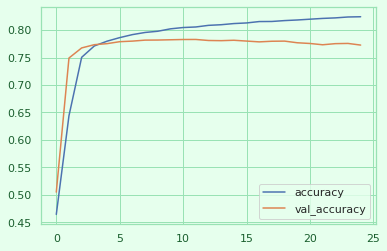

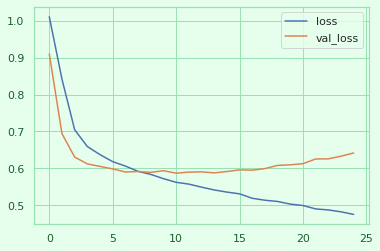

In [41]:
metrics_lstm = pd.DataFrame(model_lstm.history.history)
metrics_lstm[['accuracy', 'val_accuracy']].plot()
metrics_lstm[['loss', 'val_loss']].plot()

<a id="8"></a>
<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>GRU</b></h1>

Gated recurrent units are a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate. Another Interesting thing about  GRU is that, unlike LSTM, it does not have a separate cell state (Ct). It only has a hidden state(Ht). Due to the simpler architecture, GRUs are faster to train.

In [42]:
model_gru = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.GRU(8),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           204248    
_________________________________________________________________
gru (GRU)                    (None, 8)                 432       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 204,707
Trainable params: 204,707
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_gru.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_gru.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))

Epoch 1/25
1540/1540 [==============================] - 21s 13ms/step - loss: 1.0014 - accuracy: 0.4744 - val_loss: 0.9230 - val_accuracy: 0.5233
Epoch 2/25
1540/1540 [==============================] - 20s 13ms/step - loss: 0.8769 - accuracy: 0.6163 - val_loss: 0.7770 - val_accuracy: 0.6932
Epoch 3/25
1540/1540 [==============================] - 20s 13ms/step - loss: 0.7564 - accuracy: 0.7121 - val_loss: 0.6514 - val_accuracy: 0.7580
Epoch 4/25
1540/1540 [==============================] - 19s 12ms/step - loss: 0.6695 - accuracy: 0.7599 - val_loss: 0.6064 - val_accuracy: 0.7769
Epoch 5/25
1540/1540 [==============================] - 20s 13ms/step - loss: 0.6420 - accuracy: 0.7732 - val_loss: 0.5923 - val_accuracy: 0.7810
Epoch 6/25
1540/1540 [==============================] - 19s 12ms/step - loss: 0.6236 - accuracy: 0.7812 - val_loss: 0.5844 - val_accuracy: 0.7831
Epoch 7/25
1540/1540 [==============================] - 20s 13ms/step - loss: 0.6110 - accuracy: 0.7857 - val_loss: 0.5799 -

<AxesSubplot:>

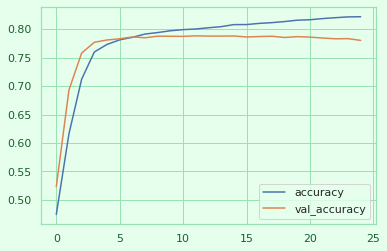

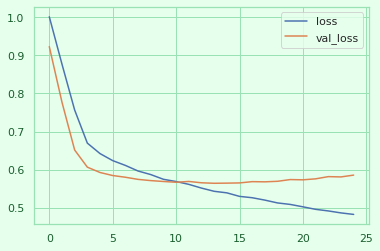

In [44]:
metrics_gru = pd.DataFrame(model_gru.history.history)
metrics_gru[['accuracy', 'val_accuracy']].plot()
metrics_gru[['loss', 'val_loss']].plot()

There are not many difference between LSTM and GRU in terms of accuracy and loss. So, in the following cell, we will build model using ELECTRA Transformer and see the overall performance

<a id="9"></a>
<h1 style="font-family: Trebuchet MS; font-size: 24px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>ELECTRA</b></h1>

ELECTRA is a new pretraining approach which trains two transformer models: the generator and the discriminator. It stands for Efficiently Learning an Encoder that Classifies Token Replacements Accurately and it is a BERT-like model. The generator’s role is to replace tokens in a sequence, and is therefore trained as a masked language model. The discriminator, which is the model we’re interested in, tries to identify which tokens were replaced by the generator in the sequence

<h1 style="font-family: Trebuchet MS; font-size: 16px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>Other valuable resources:</b></h1>

- [Official documentation](https://www.tensorflow.org/text/tutorials/classify_text_with_bert)
- [Codebasics channel](https://www.youtube.com/watch?v=hOCDJyZ6quA)

In [45]:
bert_preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
bert_encoder_url = 'https://tfhub.dev/google/electra_base/2'

bert_preprocess = hub.KerasLayer(bert_preprocess_url)
bert_encoder = hub.KerasLayer(bert_encoder_url)

In [46]:
# Example
def bert_example(sentence):
    preprocessed_text = bert_preprocess(sentence)
    return bert_encoder(preprocessed_text)['pooled_output']

In [47]:
exp = bert_example(['cat', 'dog', 'eye', 'nose'])

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([exp[0]], [exp[1]])) # flower and vegetable
print(cosine_similarity([exp[0]], [exp[2]])) # flower and eye
print(cosine_similarity([exp[2]], [exp[3]])) # eye and nose

[[0.6066152]]
[[0.31586123]]
[[0.5116301]]


<h1 style="font-family: Trebuchet MS; font-size: 16px; color: #88f7b0; text-align: left; line-height: 1.25;"><b>The result is what we are expecting, right?</b></h1>

* Cat and dog both are animal. Thus, the similarity between them is pretty high
* Eye and nose both are part of the body. Thus, the similarity between them is also pretty high
* However, cat and eye can't be compared straight away because they are totally different. Thus, they got lower similarity

In [51]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessed_text = bert_preprocess(text_input)
output = bert_encoder(preprocessed_text)

# DNN
x = tf.keras.layers.Dropout(0.2)(output['pooled_output'])
x = tf.keras.layers.Dense(3, activation='softmax')(x)

# Build the model
model_bert = tf.keras.Model(text_input, x)

In [52]:
model_bert.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_word_ids': ( 0           input_2[0][0]                    
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'sequence_output':  109482241   keras_layer[1][0]                
                                                                 keras_layer[1][1]                
                                                                 keras_layer[1][2]                
____________________________________________________________________________________________

In [53]:
model_bert.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0005),
                   metrics=['accuracy'])

model_bert.fit(X_train, train_labels, epochs=25, batch_size=32, validation_data=(X_test, test_labels))

Epoch 1/25
1540/1540 [==============================] - 424s 274ms/step - loss: 0.8199 - accuracy: 0.6514 - val_loss: 0.7575 - val_accuracy: 0.6895
Epoch 2/25
1540/1540 [==============================] - 420s 273ms/step - loss: 0.7649 - accuracy: 0.6871 - val_loss: 0.7378 - val_accuracy: 0.6978
Epoch 3/25
1540/1540 [==============================] - 421s 273ms/step - loss: 0.7512 - accuracy: 0.6912 - val_loss: 0.7219 - val_accuracy: 0.7118
Epoch 4/25
1540/1540 [==============================] - 420s 273ms/step - loss: 0.7451 - accuracy: 0.6963 - val_loss: 0.7162 - val_accuracy: 0.7147
Epoch 5/25
1540/1540 [==============================] - 419s 272ms/step - loss: 0.7440 - accuracy: 0.6958 - val_loss: 0.7129 - val_accuracy: 0.7170
Epoch 6/25
1540/1540 [==============================] - 420s 273ms/step - loss: 0.7422 - accuracy: 0.6968 - val_loss: 0.7077 - val_accuracy: 0.7178
Epoch 7/25
1540/1540 [==============================] - 420s 272ms/step - loss: 0.7420 - accuracy: 0.6970 - val_

<AxesSubplot:>

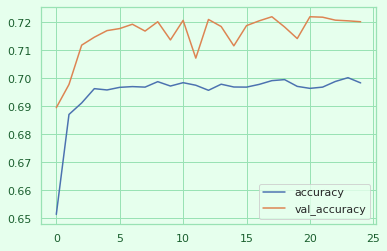

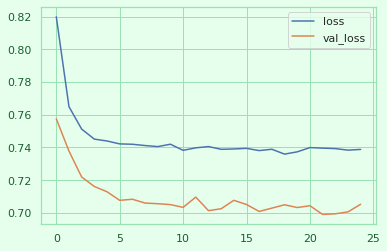

In [54]:
metrics_bert = pd.DataFrame(model_bert.history.history)
metrics_bert[['accuracy', 'val_accuracy']].plot()
metrics_bert[['loss', 'val_loss']].plot()

<a id="10"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Prediction</p>

In [64]:
def lstm_prediction(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)

    pred = model_lstm.predict(padded)
    # Get the label name back
    result = lb.inverse_transform(pred)[0]
    
    return result

def gru_prediction(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)

    pred = model_gru.predict(padded)
    # Get the label name back
    result = lb.inverse_transform(pred)[0]
    
    return result

def bert_prediction(text):
    clean_text = cleaning(text)
    
    pred = model_bert.predict([clean_text])
    # Get the label name back
    result = lb.inverse_transform(pred)[0]
    
    return result

In [65]:
text1 = "There is a major bug in the app. I can't play my playlist since the last 2 days"

print('LSTM\t: ', lstm_prediction(text1))
print('GRU\t: ', gru_prediction(text1))
print('BERT\t: ', bert_prediction(text1))

LSTM	:  Bad
GRU	:  Bad
BERT	:  Bad


In [66]:
text2 = "Love this app! the interface is clean and pleasing to the eye"

print('LSTM\t: ', lstm_prediction(text2))
print('GRU\t: ', gru_prediction(text2))
print('BERT\t: ', bert_prediction(text2))

LSTM	:  Good
GRU	:  Good
BERT	:  Good


In [70]:
text3 = "The overall experience is good, but the ads really annoying"

print('LSTM\t: ', lstm_prediction(text3))
print('GRU\t: ', gru_prediction(text3))
print('BERT\t: ', bert_prediction(text3))

LSTM	:  Good
GRU	:  Netral
BERT	:  Good


<a id="11"></a>
<p style="background-color:#1ED760;font-family:Trebuchet MS;font-weight:bold;color:#FFFFFF;font-size:40px;text-align:center;border-radius:100px 100px">Acknowledge</p>

<h1 style="font-family: Trebuchet MS; font-size: 48px; color: #1ED760; text-align: center; "><b>THE END</b></h1>